## Fetch Sample Data
I will go through data exploration steps using the Fetch Sample Data. The first part is always importing packages you might use. 

In [47]:
#Data Exploration Package
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Reciepts Dataset
Exploring the receipts dataset for reference here is the data schema for this data frame:
- _id: uuid for this receipt
- bonusPointsEarned: Number of bonus points that were awarded upon receipt completion
- bonusPointsEarnedReason: event that triggered bonus points
- createDate: The date that the event was created
- dateScanned: Date that the user scanned their receipt
- finishedDate: Date that the receipt finished processing
- modifyDate: The date the event was modified
- pointsAwardedDate: The date we awarded points for the transaction
- pointsEarned: The number of points earned for the receipt
- purchaseDate: the date of the purchase
- purchasedItemCount: Count of number of items on the receipt
- rewardsReceiptItemList: The items that were purchased on the receipt
- rewardsReceiptStatus: status of the receipt through receipt validation and processing
- totalSpent: The total amount on the receipt
- userId: string id back to the User collection for the user who scanned the receipt

In [48]:
#importing json database into a pandas data frame make sure your path is correct
receipts_df = pd.read_json('/kaggle/input/fecth-sample-set/receipts.json', lines=True)

Now we use functions that will check the size and shape of the dataframe

In [49]:
#checking columns and rows
print(receipts_df.shape, "Rows and Columns for receipts dataframe\n")
#checking size of dataframe
print(receipts_df.size, "size of receipts dataframe")

(1119, 15) Rows and Columns for receipts dataframe

16785 size of receipts dataframe


Using info function we check for non nulls and data type of each columns

In [50]:
#checking null values and field types using info
receipts_info = receipts_df.info()
receipts_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      1119 non-null   object 
 1   bonusPointsEarned        544 non-null    float64
 2   bonusPointsEarnedReason  544 non-null    object 
 3   createDate               1119 non-null   object 
 4   dateScanned              1119 non-null   object 
 5   finishedDate             568 non-null    object 
 6   modifyDate               1119 non-null   object 
 7   pointsAwardedDate        537 non-null    object 
 8   pointsEarned             609 non-null    float64
 9   purchaseDate             671 non-null    object 
 10  purchasedItemCount       635 non-null    float64
 11  rewardsReceiptItemList   679 non-null    object 
 12  rewardsReceiptStatus     1119 non-null   object 
 13  totalSpent               684 non-null    float64
 14  userId                  

There are many columns with null values and it is strange that purchased item count is a float. I would consult a data engineer in charge of this data frame to clarify if this typing is correct.

Now checking first couple of observations using head function

In [51]:
#checking out the value of the first few rows
receipts_df.head(5)

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


It looks like some columns are dictionary type objects. Interesting part is how the date is stored. It looks like it is hashed with some function, which makes it complicated to verify if the create date is always less than the finished date without reversing the hash. We can see that the userId and oid inside the _id dictionary are also hashed but this is understandable to protect user personal information.

Now lets look at some unique values for some fields.

In [52]:
print(receipts_df['bonusPointsEarned'].unique(), "unique values in bonusPointsEarned\n")

print(receipts_df['bonusPointsEarnedReason'].unique(), "unique values in bonusPointsEarnedReason\n")

print(receipts_df['pointsEarned'].unique(), "unique values in pointsEarned\n")

print(receipts_df['purchasedItemCount'].unique(), "unique values in purchasedItemCount\n")

print(receipts_df['rewardsReceiptStatus'].unique(), "unique values in rewardsReceiptStatus\n")

print(receipts_df['totalSpent'].unique(), "unique values in totalSpent\n")

[500. 150.   5. 750. 250. 100. 300.  nan  40.  25.  45.  27.  21.] unique values in bonusPointsEarned

['Receipt number 2 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)'
 'Receipt number 5 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)'
 'All-receipts receipt bonus'
 'Receipt number 1 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)'
 'Receipt number 3 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)'
 'Receipt number 6 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)'
 'Receipt number 4 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)'
 nan 'COMPLETE_PARTNER_RECEIPT' 'COMPLETE_NONPARTNER_RECEIPT'] unique values in bonusPointsEarnedReason

[5.00000e+02 1.50000e+02 5.00000e+00 7.50000e+02 2.50000e+02 1.00000e+02
 8.85000e+03 3.00000e+02         nan 3.89200e+02 1.85000e+02 3.50000e+01
 6.50000e+02 5.50000e+01 5.00000e+01 3.55000e+02 6.00000e+02 1.75000e+03
 3.50000e+02 2.25000e

Observing the unique values there is no apparent miss entries. I would ask a subject matter expert though to check this outliers to see if any of them seems odd specially the 689 purchased item count. 

Time to see some summary information about the data

In [53]:
#summary data quantiles, mean, std, min, max for numeric columns
print(receipts_df.describe(),'\n')
#summary data for quantitative data shows mode, count, number of unique values, mode frequency
print(receipts_df.filter(items=['_id','userId','rewardsReceiptStatus','bonusPointsEarnedReason']).describe(),'\n')



       bonusPointsEarned  pointsEarned  purchasedItemCount   totalSpent
count         544.000000    609.000000           635.00000   684.000000
mean          238.893382    585.962890            14.75748    77.796857
std           299.091731   1357.166947            61.13424   347.110349
min             5.000000      0.000000             0.00000     0.000000
25%             5.000000      5.000000             1.00000     1.000000
50%            45.000000    150.000000             2.00000    18.200000
75%           500.000000    750.000000             5.00000    34.960000
max           750.000000  10199.800000           689.00000  4721.950000 

                                         _id                    userId  \
count                                   1119                      1119   
unique                                  1119                       258   
top     {'$oid': '5ff1e1eb0a720f0523000575'}  5fc961c3b8cfca11a077dd33   
freq                                       1          

The max values for each column except for bonusPointEarned deviates too much from the mean. As for non numeric data we can see that the primary key isn't repeated so there is no issue with _id columns.

I will generate boxplots and histograms to really see the distribution of these columns.

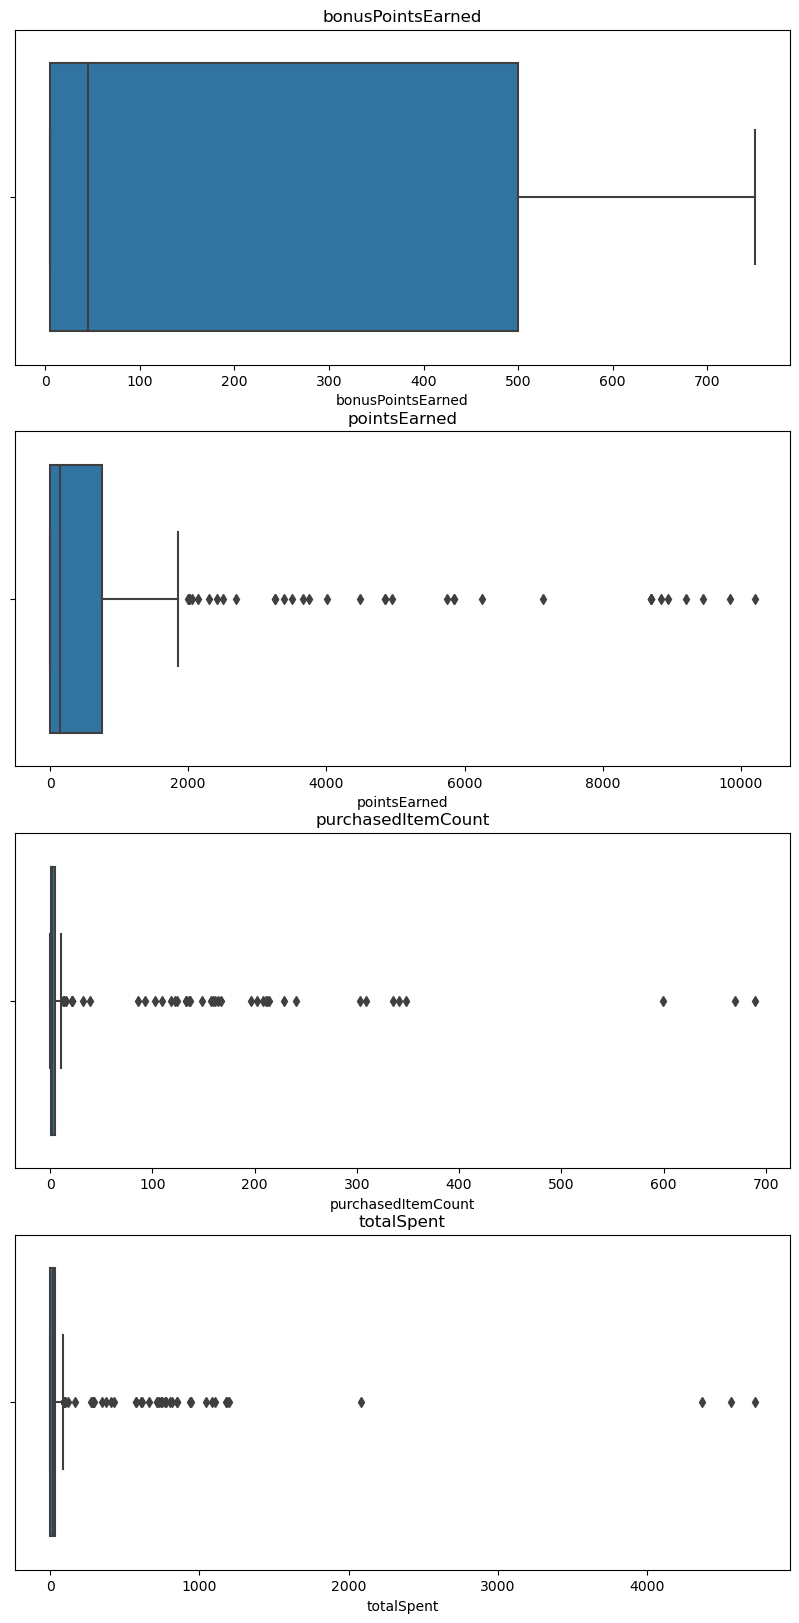

In [54]:
#preparing to create multiple plots to show 
#columns you want to create a plot for
columns = ['bonusPointsEarned', 'pointsEarned', 'purchasedItemCount', 'totalSpent']
#this counter that will assign a plot to an axs
axes = 0
#going with a verticle stack subplot
fig, axs = plt.subplots(len(columns),figsize=(10,20))
#for loop iteration for column
for c in columns:
    sns.boxplot(data=receipts_df,ax=axs[axes], x=c)
    axs[axes].set_title(c)
    axes+=1

You can see from these boxplots that the distribution is skewed to the right, which is normal for real world data. However, we can eliminate outliers to make the distribution more normal so that statistical modelling will be more accurate

Creating histogram for the non numeric columns to check their distribution.

In [55]:
receipts_df.groupby('rewardsReceiptStatus').count()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,totalSpent,userId
rewardsReceiptStatus,,,,,,,,,,,,,,
FINISHED,518,456,456,518,518,518,518,514,518,518,518,516,518,518
FLAGGED,46,30,30,46,46,0,46,19,33,35,46,46,46,46
PENDING,50,0,0,50,50,50,50,0,0,49,0,49,49,50
REJECTED,71,58,58,71,71,0,71,4,58,69,71,68,71,71
SUBMITTED,434,0,0,434,434,0,434,0,0,0,0,0,0,434


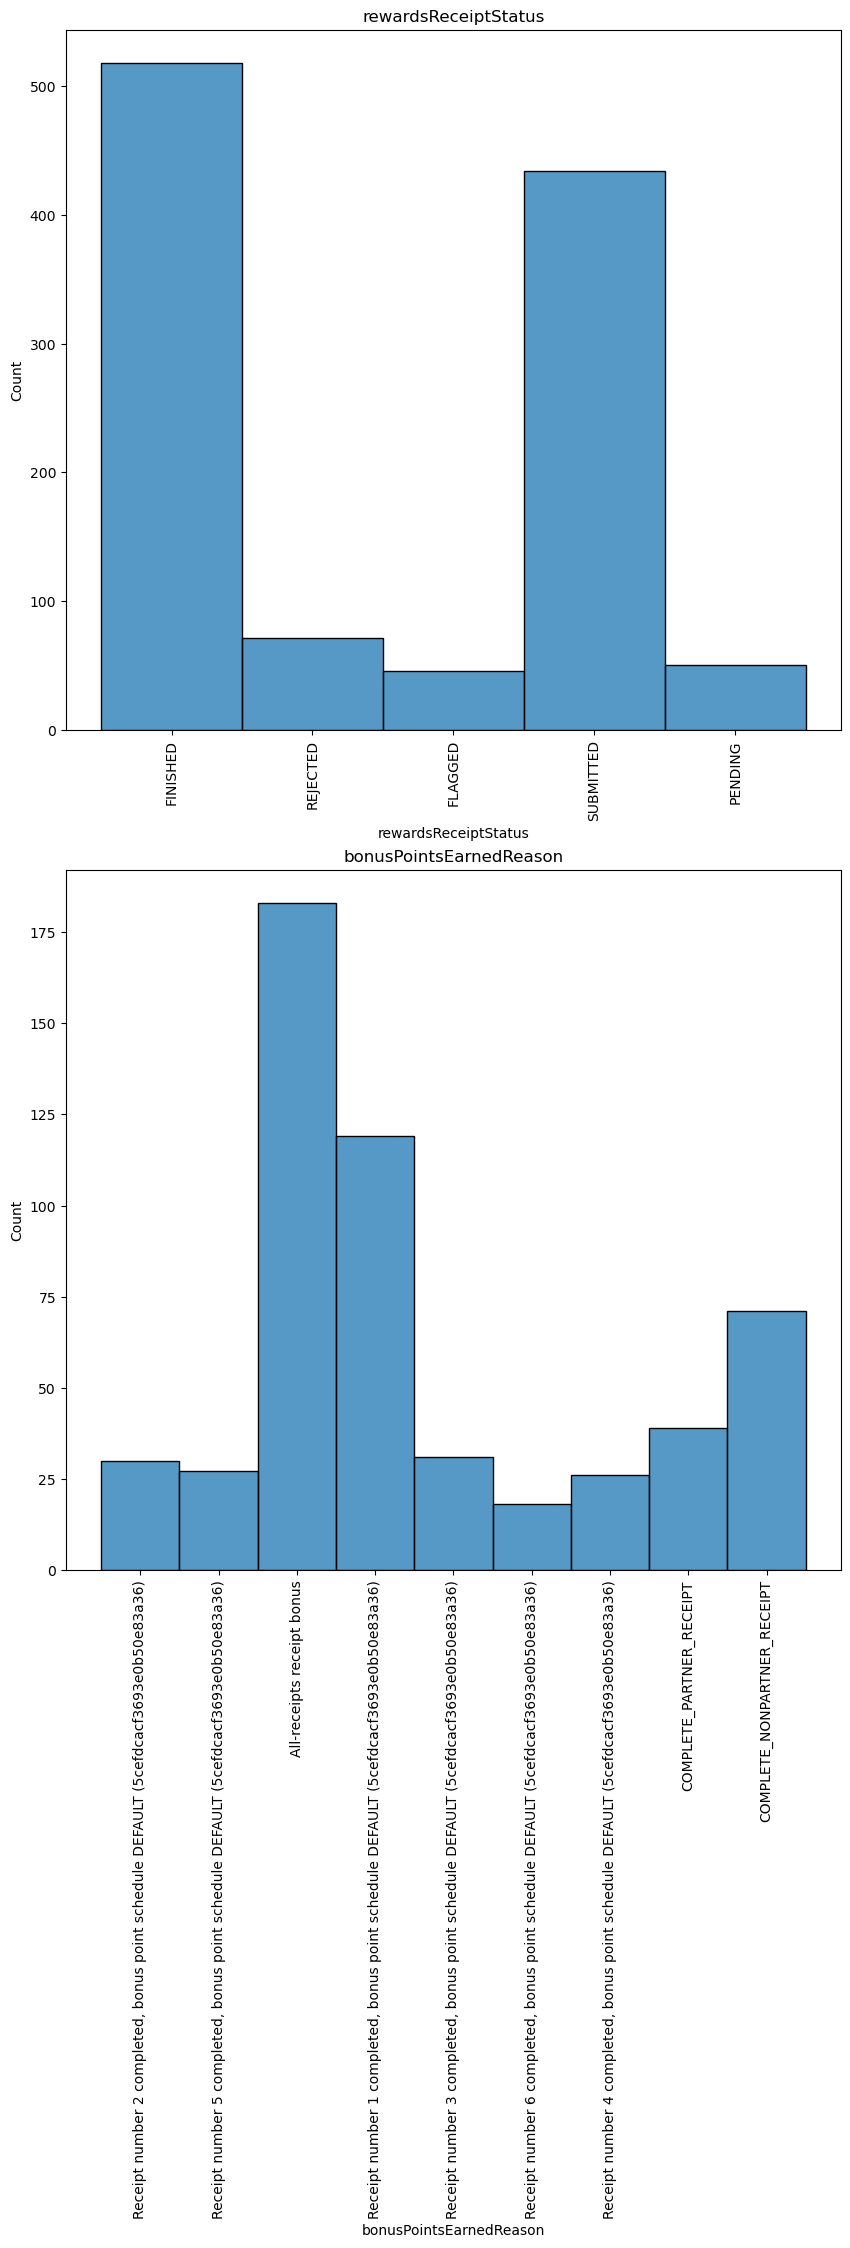

In [56]:
#preparing to create multiple plots to show 
#columns you want to create a plot for
columns = ['rewardsReceiptStatus','bonusPointsEarnedReason']
#this counter that will assign a plot to an axs
axes = 0
#going with a verticle stack subplot
fig, axs = plt.subplots(len(columns),figsize=(10,20))
#for loop iteration for column
for c in columns:
    sns.histplot(data=receipts_df,ax=axs[axes], x=c)
    axs[axes].set_title(c)
    axs[axes].tick_params(axis = 'x', labelrotation = 90)
    axes+=1
    


We can see here that there isn't a stand out suspicious data just by looking at the histogram. I would consult a subject matter expert to actually see if any of this data is suspicious.

Now the standout data quality issue we have is that when we did our info function so many columns have null values which is missing data. This is bad for analytics as we can't use missing values for forecasting and predictive modelling. The less the samplesize is the worst our accuracy will be so it is important to fill in missing data if we can. I will actually create a data frame to capture this.

In [57]:
#creating a dataframe for all observations with null value
receipts_null_df = receipts_df[receipts_df.isnull().any(axis=1)]
receipts_null_df.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
12,{'$oid': '5ff1e1b60a7214ada100055c'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687478000},{'$date': 1609687478000},NaN,{'$date': 1609687478000},NaN,8850.0,{'$date': 1612365878000},10.0,"[{'barcode': '034100573065', 'description': 'M...",FLAGGED,290.0,5ff1e194b6a9d73a3a9f1052
13,{'$oid': '5f9c74f70a7214ad07000037'},750.0,"Receipt number 1 completed, bonus point schedu...",{'$date': 1604089079000},{'$date': 1604089079000},NaN,{'$date': 1609687494000},{'$date': 1604089080000},750.0,{'$date': 1604002679000},11.0,"[{'barcode': '075925306254', 'competitiveProdu...",REJECTED,1.0,5f9c74f7c88c1415cbddb839
15,{'$oid': '5ff1e1e90a7214ada1000569'},NaN,NaN,{'$date': 1609687529000},{'$date': 1609687529000},NaN,{'$date': 1609687529000},NaN,NaN,NaN,0.0,"[{'needsFetchReview': True, 'needsFetchReviewR...",FLAGGED,0.0,5ff1e1e9b6a9d73a3a9f10f6
17,{'$oid': '5ff1e1b40a7214ada100055b'},750.0,"Receipt number 1 completed, bonus point schedu...",{'$date': 1609687476000},{'$date': 1609687476000},NaN,{'$date': 1609687477000},{'$date': 1609687476000},750.0,{'$date': 1609601076000},1.0,"[{'barcode': '075925306254', 'competitiveProdu...",FLAGGED,1.0,5ff1e1b4cfcf6c399c274a54


Checking the shape, size, info to see the basic structure of all the observations with a null value

In [58]:
#info on the nulls dataframe
print(receipts_null_df.shape, "rows and columns")
print(receipts_null_df.size, "size of dataframe")
print(receipts_null_df.info())

(665, 15) rows and columns
9975 size of dataframe
<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 2 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      665 non-null    object 
 1   bonusPointsEarned        90 non-null     float64
 2   bonusPointsEarnedReason  90 non-null     object 
 3   createDate               665 non-null    object 
 4   dateScanned              665 non-null    object 
 5   finishedDate             114 non-null    object 
 6   modifyDate               665 non-null    object 
 7   pointsAwardedDate        83 non-null     object 
 8   pointsEarned             155 non-null    float64
 9   purchaseDate             217 non-null    object 
 10  purchasedItemCount       181 non-null    float64
 11  rewardsReceiptItemList   225 non-null    object 
 12  rewardsReceiptStatus     665 non-null    object 
 13  totalSpent               230 

We see that 665 obesrvations have null entries, which means many of the observations in our receipt data set contains null values that will make them useless when we do data analysis. We need to fill in missing value either by encoding or replacing nulls with mean, median, mode of the column.

### Brands Dataset

We will basically repeat the steps above to the columns of this data set to check for data quality. Here is the dataset schema:
- _id: brand uuid
- barcode: the barcode on the item
- brandCode: String that corresponds with the brand column in a partner product file
- category: The category name for which the brand sells products in
- categoryCode: The category code that references a BrandCategory
- cpg: reference to CPG collection
- topBrand: Boolean indicator for whether the brand should be featured as a 'top brand'
- name: Brand name



In [59]:
#importing json database into a pandas data frame make sure your path is correct
brands_df = pd.read_json('/kaggle/input/fecth-sample-set/brands.json', lines=True)

In [60]:
#checking columns and rows
print(brands_df.shape, "Rows and Columns for brands dataframe\n")
#checking size of dataframe
print(brands_df.size, "size of brands dataframe")

(1167, 8) Rows and Columns for brands dataframe

9336 size of brands dataframe


In [64]:
#checking null values and field types using info
brands_info = brands_df.info()
brands_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           1167 non-null   object 
 1   barcode       1167 non-null   int64  
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   cpg           1167 non-null   object 
 5   name          1167 non-null   object 
 6   topBrand      555 non-null    float64
 7   brandCode     933 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 73.1+ KB


There is a problem with the data type of topBrand boolean numbers are represented by 0 and 1 which should be stored as integer type not float. Also, there many null values here. 

In [63]:
#checking out the value of the first few rows
brands_df.head(5)

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [66]:
#Checking unique values
print(brands_df['category'].unique(), "unique values in category\n")

print(brands_df['categoryCode'].unique(), "unique values in categoryCode\n")

print(brands_df['name'].unique(), "unique values in name\n")

print(brands_df['topBrand'].unique(), "unique values in topBrand\n")

print(brands_df['brandCode'].unique(), "unique values in brandCode\n")

['Baking' 'Beverages' 'Candy & Sweets' 'Condiments & Sauces'
 'Canned Goods & Soups' nan 'Magazines' 'Breakfast & Cereal'
 'Beer Wine Spirits' 'Health & Wellness' 'Beauty' 'Baby' 'Frozen'
 'Grocery' 'Snacks' 'Household' 'Personal Care' 'Dairy'
 'Cleaning & Home Improvement' 'Deli' 'Beauty & Personal Care'
 'Bread & Bakery' 'Outdoor' 'Dairy & Refrigerated'] unique values in category

['BAKING' 'BEVERAGES' 'CANDY_AND_SWEETS' nan 'HEALTHY_AND_WELLNESS'
 'GROCERY' 'PERSONAL_CARE' 'CLEANING_AND_HOME_IMPROVEMENT'
 'BEER_WINE_SPIRITS' 'BABY' 'BREAD_AND_BAKERY' 'OUTDOOR'
 'DAIRY_AND_REFRIGERATED' 'MAGAZINES' 'FROZEN'] unique values in categoryCode

['test brand @1612366101024' 'Starbucks' 'test brand @1612366146176' ...
 'test brand @1598639215217' 'LIPTON TEA Leaves'
 'test brand @1613158231643'] unique values in name

[ 0. nan  1.] unique values in topBrand

[nan 'STARBUCKS' 'TEST BRANDCODE @1612366146176'
 'TEST BRANDCODE @1612366146051' 'TEST BRANDCODE @1612366146827'
 'TEST BRANDCODE @161

I don't know if what Test Brandcode mean, but since it adds too much noice in the brancode column I will remove any value that contain TEST BRANDCODE from it. Also what is the Category code used for? we might have redundancy if we have category and categoryCode columns without using categopryCode for something.

In [76]:
#Using Filter to remove Test brancode values
mask = brands_df['brandCode'].str.contains('TEST BRANDCODE')
testcodebrands_df = brands_df[mask == True]

brands_df = brands_df[~brands_df.isin(testcodebrands_df)]

#checking again unique values of brand code
print(brands_df['brandCode'].unique(), "unique values in brandCode\n")

[nan 'STARBUCKS' 'J.L. KRAFT' 'CAMPBELLS HOME STYLE' 'TEST' 'CALUMET'
 '511111205012' 'AUNT JEMIMA SYRUP' 'MOLSON' 'LOTRIMIN' 'ST IVES'
 'CHRISIMAGE' 'ALKA SELTZER' "JACK DANIEL'S BARBECUE" 'MAGNUM Ice Cream'
 '511111105329' 'TACO BELL' 'FROSTED CHEERIOS'
 'GODIVA DRY PACKAGED DESSERTS' 'LARABAR' 'COTTONELLE' 'IZZE' 'MIO'
 '511111505365' 'QUILTING SPECIAL EDITION' 'HERMAN' 'KEVITA' 'DELIMEX'
 'THE RIGHT TO SHOWER' 'CARESS' 'TEST BRAND CODE' 'SWANSON' 'DASH-2249 1'
 '511111805854' 'KETTLE BRAND' 'CAMPBELLS SOUP AT HAND ' 'RAINBO'
 'CRISPIN' 'CLARITIN®' 'COOKIE CRISP' 'SNYDERS OF HANOVER' 'GOOD SEASONS'
 'REVOLVER' 'KEYSTONE LIGHT' 'BETTY CROCKER FRUIT ROLL UPS' 'MOMOFUKU'
 'POPSICLE' 'MUG Root Beer' 'TOMS' 'PROMISE' 'OFF THE EATEN PATH'
 "NANCY'S" 'CAMPBELLS CHUNKY MAXX' 'FOOD NETWORK KITCHEN INSPIRATIONS'
 'SABRITAS' 'GEVALIA KAFFE' "O THAT'S GOOD" "CHESTER'S" "MISS VICKIE'S"
 "SIR KENSINGTON'S" 'DORITOS' 'A.1.' 'LOOZA JUICES' 'ALEVE'
 'SOFT-SHEEN CARSON - HAIR COLOR' '' 'PULL UPS' 'BR

We have a problem with why the name and barcode for many entries doesn't match. If the schema is correct shouldn't there be an equal number of name per brancode? We need to consult a data engineer to clarify this discrepancy. Making plots doesn't really make sense for this dataset as we already see the problem without an histogram. Though I do want to check if barcode is a unique value for each observation.

In [93]:
#seeing if barcode is unique by checking mode frequency
print(brands_df['barcode'].dropna().astype('str').describe(), '\n')

#seeing if _id is unique
print(brands_df['_id'].describe(), '\n')

count                810
unique               803
top       511111704140.0
freq                   2
Name: barcode, dtype: object 

count                                      810
unique                                     810
top       {'$oid': '601ac115be37ce2ead437551'}
freq                                         1
Name: _id, dtype: object 



We can see that Barcode is not unique and _id is unique

### Users DataSet
Doing the last EDA with Users Dataset. Here is the schema:
- _id: user Id
- state: state abbreviation
- createdDate: when the user created their account
- lastLogin: last time the user was recorded logging in to the app
- role: constant value set to 'CONSUMER'
- active: indicates if the user is active; only Fetch will de-activate an account with this flag

In [77]:
#importing json database into a pandas data frame make sure your path is correct
users_df = pd.read_json('/kaggle/input/fecth-sample-set/users.json', lines=True)

In [78]:
#checking columns and rows
print(users_df.shape, "Rows and Columns for users dataframe\n")
#checking size of dataframe
print(users_df.size, "size of users dataframe")

(495, 7) Rows and Columns for users dataframe

3465 size of users dataframe


In [79]:
#checking null values and field types using info
users_info = users_df.info()
users_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _id           495 non-null    object
 1   active        495 non-null    bool  
 2   createdDate   495 non-null    object
 3   lastLogin     433 non-null    object
 4   role          495 non-null    object
 5   signUpSource  447 non-null    object
 6   state         439 non-null    object
dtypes: bool(1), object(6)
memory usage: 23.8+ KB


Aside from null values on some columns there isn't really a clear issue we can see by just looking at info

In [80]:
#checking out the value of the first few rows
users_df.head(5)

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


checking unique values

In [94]:
print(users_df['active'].unique(), "unique values in active\n")

print(users_df['role'].unique(), "unique values in role\n")

print(users_df['signUpSource'].unique(), "unique values in signUpSource\n")

print(users_df['state'].unique(), "unique values in state\n")


[ True False] unique values in active

['consumer' 'fetch-staff'] unique values in role

['Email' 'Google' nan] unique values in signUpSource

['WI' 'KY' 'AL' 'CO' 'IL' nan 'OH' 'SC' 'NH'] unique values in state



The problem with this is that the data schema says role is a constant consumer but we see an entry for fetch-staff. Need to clarify if email refers to other emails and google refers to gmail. As with the other dataset we should check the primary is unique.

In [95]:
print(users_df['_id'].describe(), "\n")

count                                      495
unique                                     212
top       {'$oid': '54943462e4b07e684157a532'}
freq                                        20
Name: _id, dtype: object 



We can see that this dataset's primary key has errors because it repeats there is only 212 unique values when the count is 495.

### Conclusion
There are issues in each datasets. The reciepts data has many columns with null values; it has a strange data typing like item count being a float; it has many outliers in its numeric column. Then the brands dataset has many bad entries like boolean integers being stored as float type. Going through the users dataset we see an issue with its primary key having duplicates, which is a security issue because it compromises the integrity of the dataset. 